### LEON MANGALISO SIHLONGONYANE: ASSIGNMENT 1

**Import libraries to carry out some capabilities**

---



---



In [66]:
import numpy as np  #able to do numeracal operations
np.random.seed(1337) # for reproducibility
import pandas       #able to import CV files and other data manipulation
import tensorflow as tf  # able to apply nueral network modelling
from tensorflow.keras import Sequential  # for plain stack of layers
from tensorflow.keras.layers import Dense  # to create fully connected layers
from tensorflow.keras import metrics  #able to calculate accuracy of model
from imblearn.under_sampling import RandomUnderSampler #to perform random under-sampling.
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor  #The Keras wrappers return the mean loss 
from sklearn.metrics import mean_squared_error  #for mean square error
from sklearn.preprocessing import StandardScaler  #for scaling data
from sklearn.model_selection import train_test_split   #able to split data into training and testing
import matplotlib.pyplot as plt   # able to plot
from sklearn.metrics import confusion_matrix, accuracy_score   #able to calculate accuracy score for model
from keras.utils import np_utils  #able to do one hot encoding



**Import data**

In [67]:
dataframe = pandas.read_csv("https://drive.google.com/uc?id=1PzJA23lUSlf2x1DeF_ek1YSAj-RFHWCp")
dataset = dataframe.values    #we import CV file from online

**Check data**

In [68]:
dataframe.head()  #view data

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,Target
0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,0.188654,...,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,0
1,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,0.270958,...,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,0
2,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,0.266064,...,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,0
3,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,0.267279,...,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,0
4,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,0.332695,...,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,0


In [69]:
dataframe.shape   #check shape

(5474, 22)

**Assinging X and Y values of data**

In [70]:
X = dataframe.drop(columns=['Target']).values   #remove 1st column what remains are the features
Y = dataframe['Target'].values #target  

In [71]:
X.shape  #check shape of X

(5474, 21)

In [72]:
Y.shape  #check shape consistency of Y

(5474,)

**Undersampling to avoid overfitting and biasness**

In [73]:
R=RandomUnderSampler(random_state=1)  # without this, the confusiomn matrix was worse, indicationg overfitting.
X,Y=R.fit_resample(X,Y)

**Splitting data into training and testing**

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3) #splitting data into training 70% and testing 30%

In [75]:
X_train #check data for consistency

array([[ 0.46262565, -0.02696964, -0.02100747, ..., -0.03734475,
         0.08962552,  0.14452122],
       [ 0.51121852,  0.26375242,  0.38862191, ...,  0.07670753,
        -0.22725726, -0.13048063],
       [ 0.55831738,  0.78065641,  0.44947842, ...,  0.12402538,
         0.014855  , -0.19876274],
       ...,
       [-0.00356364,  0.06904895,  0.65632214, ..., -0.04632749,
         0.10511495,  0.09676343],
       [ 0.45237082,  0.60672178,  0.47305909, ..., -0.04282124,
         0.07518425,  0.01262208],
       [ 0.5298313 ,  0.22473103,  0.42788393, ...,  0.15721254,
         0.10962839, -0.1086241 ]])

In [76]:
Y_test #check data for consistency

array([4, 0, 0, 4, 0, 1, 2, 2, 4, 1, 1, 1, 3, 3, 4, 2, 3, 0, 1, 1, 4, 3,
       0, 0, 0, 4, 0, 2, 4, 0, 1, 1, 1, 3, 1, 0, 3, 2, 2, 3, 1, 0, 1, 1,
       2, 0, 1, 4, 1, 3, 1, 1, 2, 2, 3, 4, 0, 4, 0, 4, 0, 0, 0, 1, 3, 1,
       0, 0, 0, 2, 4, 4, 1, 3, 0, 0, 2, 1, 4, 2, 2, 2, 0, 4, 1, 2, 4, 3,
       2, 4, 1, 1, 3, 1, 0, 4, 4, 2, 1, 3, 0, 0, 3, 3, 0, 4, 3, 2, 1, 3,
       0, 0, 2, 4, 3, 4, 3, 4, 0, 3, 1, 2, 2, 4, 3, 4, 0, 3, 0, 2, 0, 1,
       2, 4, 2, 2, 4, 4, 0, 0, 0, 0, 3, 0, 0, 4, 3, 4, 0, 1, 2, 2, 0, 2,
       3, 1, 2, 0, 0, 3, 1, 1, 2, 4, 4, 3, 0, 1, 1, 4, 0, 2, 1, 3, 3, 2,
       0, 2, 0, 0, 1, 3, 3, 1, 3, 4, 0, 0, 2, 3, 0, 3, 2, 0, 1, 4, 1, 2,
       2, 2, 0, 2, 2, 0, 1, 0, 1, 3, 3, 3, 2, 2, 3, 2, 4, 2, 3, 4, 0, 2,
       2, 3, 4, 4, 2, 0, 2, 4, 0, 0, 0, 3, 1, 3, 4, 4, 1, 1, 4, 4, 2, 2,
       3, 0, 4, 1, 2, 1, 2, 2, 0, 4, 4, 1, 0, 0, 3, 0, 4, 4, 1, 2, 4, 2,
       0, 2, 1, 4, 2, 1, 0, 1, 1, 3, 1, 4, 2, 2, 4, 0, 3, 1, 1, 0, 3, 3,
       0, 2, 0, 0, 3, 2, 4, 0, 1, 3, 3, 0, 3, 4, 4,

**Check number of classes**



In [77]:
classes = np.unique(Y_train)          #checking number classes, we use results for determining number of output layers to pick for our model 
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


**One Hot encoding**

In [78]:
Y_train=np_utils.to_categorical(Y_train)  #Converts a class vector to binary class matrix
Y_test=np_utils.to_categorical(Y_test)

In [79]:
Y_test  #check data consistency

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

**Create model**

In [80]:
# define the model
def baseline():
    # create model
    model = Sequential()
    
    # add one fully connected layer
    model.add(Dense(15, input_dim=21, activation='relu'))
    # add a fully connected layer for the output
    model.add(Dense(13,activation='relu'))
    model.add(Dense(5,activation='softmax'))
    # Compile model
    model.compile(loss="categorical_crossentropy", optimizer='adam',metrics=["accuracy"])
    
    return model# Your code here

In [81]:
model=baseline()# Nueral network model initialised

In [82]:
model.summary()# summary of trainable parameters

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 15)                330       
                                                                 
 dense_7 (Dense)             (None, 13)                208       
                                                                 
 dense_8 (Dense)             (None, 5)                 70        
                                                                 
Total params: 608
Trainable params: 608
Non-trainable params: 0
_________________________________________________________________


In [83]:
X_train.shape   # we check shape for consistency

(1085, 21)

**Split data into Training and Testing Validation**

In [84]:
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.3,random_state=3)# we split data into test, train and validation

In [85]:
history=model.fit(X_train,Y_train,validation_data=(X_val,Y_val),epochs=20,batch_size=4,verbose=1)

Epoch 1/20
190/190 [==============================] - 1s 2ms/step - loss: 1.3756 - accuracy: 0.5033 - val_loss: 1.1605 - val_accuracy: 0.7055
Epoch 2/20
190/190 [==============================] - 0s 1ms/step - loss: 0.8527 - accuracy: 0.8379 - val_loss: 0.6713 - val_accuracy: 0.8865
Epoch 3/20
190/190 [==============================] - 0s 1ms/step - loss: 0.4839 - accuracy: 0.9038 - val_loss: 0.4813 - val_accuracy: 0.8558
Epoch 4/20
190/190 [==============================] - 0s 1ms/step - loss: 0.3433 - accuracy: 0.9144 - val_loss: 0.3688 - val_accuracy: 0.9202
Epoch 5/20
190/190 [==============================] - 0s 1ms/step - loss: 0.2652 - accuracy: 0.9354 - val_loss: 0.3171 - val_accuracy: 0.9294
Epoch 6/20
190/190 [==============================] - 0s 1ms/step - loss: 0.2207 - accuracy: 0.9473 - val_loss: 0.2847 - val_accuracy: 0.9264
Epoch 7/20
190/190 [==============================] - 0s 1ms/step - loss: 0.1883 - accuracy: 0.9565 - val_loss: 0.2629 - val_accuracy: 0.9294
Epoch 

**Check model prediction**

In [86]:
prediction = model.predict(X_test)  #Predict test data

In [87]:
mean_squared_error(Y_test, prediction)  #compute mean error

0.01488397

In [88]:
prediction_classes=np.argmax(prediction,axis=1)

In [89]:
accuracy_score(np.argmax(Y_test,1),prediction_classes)# we check accuracy percentage of our model

0.9526881720430107

In [90]:
prediction=np.argmax(prediction,axis=1)

In [91]:
Y_pred=np.argmax(Y_test,axis=1)

In [92]:
confusion_matrix(Y_pred,prediction)  #confusion matrix to check if distribution of data is correct

array([[98,  4,  0,  2,  2],
       [ 1, 92,  0,  2,  0],
       [ 0,  0, 85,  0,  0],
       [ 4,  2,  5, 84,  0],
       [ 0,  0,  0,  0, 84]])

**Plot accuracy of our model**

In [93]:
def plot_hist(h, xsize=6, ysize=10):

    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]
    fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True)
    
    # summarize history for Accuracy
    plt.subplot(211)
    plt.plot(h['accuracy'])
    plt.plot(h['val_accuracy'])
    plt.title('Training Performance')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='best')
    
    plt.draw()
    plt.show()

    return

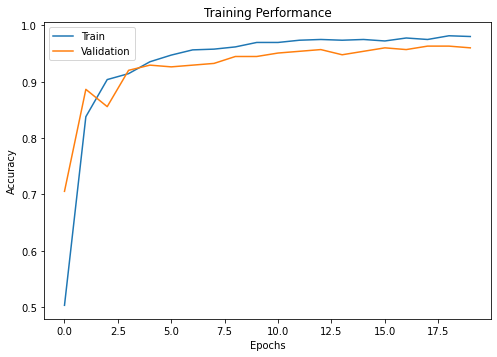

In [94]:
plot_hist(history.history, xsize=8, ysize=12)  #plot command

**Conclusions**

- Sucessfully undersampled baised data, to prepare data for splitting into training and training, as shown.
- We also converted the data from vector form to binary matrix, before creating the nueral network model
- We splitted the data into training, testing and validation, with 20 epochs
- We then created a neural network with 5 output layers and 608 weights (successfully trainable)
***
**Results after training model:**
* Model is about 95 % accurate with mean square error of around 0.02. This is a well trained model. The plot of training performances shows the 'train' curve always closer to 'validation' curve.